In [1]:
from google.colab import drive
drive.mount("/content/gdrive")  
!pwd  # show current path 

Mounted at /content/gdrive
/content


In [2]:
%cd "/content/gdrive/MyDrive/a01369984_IA/DP/"
!ls  # show current directory

/content/gdrive/MyDrive/a01369984_IA/DP
DogBreeds.h5  images  images_test  img	img_test  Mexican_hairless  VideoDP


In [3]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import optimizers, layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
print(os.listdir("/content/gdrive/My Drive/a01369984_IA/DP"))

['images', 'images_test', 'img', 'Mexican_hairless', 'img_test', 'DogBreeds.h5', 'VideoDP']


Dataset

https://www.kaggle.com/datasets/jessicali9530/stanford-dogs-dataset?datasetId=119698&sortBy=voteCount

In [5]:
img = ("/content/gdrive/My Drive/a01369984_IA/DP/img")
test = ("/content/gdrive/My Drive/a01369984_IA/DP/img_test")

In [6]:
datagen = ImageDataGenerator(
							rescale = 1./255,
              vertical_flip=False,
							horizontal_flip = True,
							rotation_range = 45,
							shear_range = 0.2,
							zoom_range = 0.2,
       				validation_split=0.20)

train = datagen.flow_from_directory(
							img,
							target_size = (224, 224),
							batch_size = 20,
							class_mode ='categorical',
              subset="training")

val = datagen.flow_from_directory(
							img,
							target_size = (224,224),
							batch_size =20,
							class_mode= 'categorical',
              subset="validation")

steps_size_train = train.n//train.batch_size
steps_size_val = val.n//val.batch_size

Found 410 images belonging to 3 classes.
Found 101 images belonging to 3 classes.


Modelo

In [7]:
from tensorflow.keras.applications import VGG16 

conv_base= VGG16(weights='imagenet',
								include_top = False,
								input_shape = (224,224,3))
								
model = Sequential()
model.add(conv_base)
model.add(GlobalAveragePooling2D())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3,activation='sigmoid'))

conv_base.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 14,780,739
Trainable params: 66,051
Non-trainable params: 14,714,688
_______________________________________

In [9]:
optimizer = optimizers.Adam(learning_rate=1e-2)
model.compile(optimizer=optimizer, loss='categorical_crossentropy',
                           metrics=["accuracy"])

Entrenamiento

In [10]:
hist = model.fit(train, 
				steps_per_epoch = steps_size_train,  
				epochs = 20, 
				validation_data = val, 
				validation_steps = steps_size_val)

Epoch 1/20
20/20 [==============================] - 267s 14s/step - loss: 1.3616 - accuracy: 0.3590 - val_loss: 0.9766 - val_accuracy: 0.3900
Epoch 2/20
20/20 [==============================] - 269s 14s/step - loss: 0.9965 - accuracy: 0.5000 - val_loss: 0.8804 - val_accuracy: 0.5900
Epoch 3/20
20/20 [==============================] - 273s 14s/step - loss: 0.8490 - accuracy: 0.5897 - val_loss: 0.7897 - val_accuracy: 0.6600
Epoch 4/20
20/20 [==============================] - 263s 13s/step - loss: 0.7796 - accuracy: 0.6795 - val_loss: 0.6925 - val_accuracy: 0.7500
Epoch 5/20
20/20 [==============================] - 261s 13s/step - loss: 0.7221 - accuracy: 0.7103 - val_loss: 0.6135 - val_accuracy: 0.7600
Epoch 6/20
20/20 [==============================] - 259s 13s/step - loss: 0.6695 - accuracy: 0.7359 - val_loss: 0.6275 - val_accuracy: 0.7600
Epoch 7/20
20/20 [==============================] - 262s 13s/step - loss: 0.6119 - accuracy: 0.7436 - val_loss: 0.6305 - val_accuracy: 0.7600
Epoch 

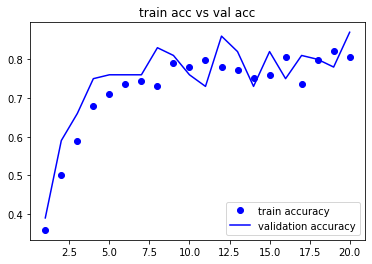

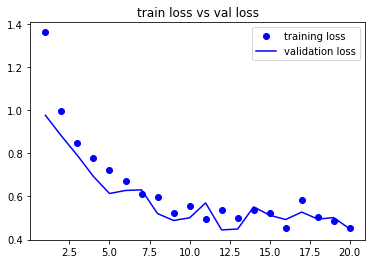

In [11]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.plot(epochs,val_acc, 'b', label='validation accuracy')
plt.title('train acc vs val acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.plot(epochs,val_loss, 'b', label = 'validation loss')
plt.title('train loss vs val loss')
plt.legend()

plt.show()

In [12]:
test_gen = ImageDataGenerator(1./255)

testset = test_gen.flow_from_directory(
					test,
					target_size = (224, 224),
					batch_size = 20,
          class_mode ='categorical')

steps_size_test = testset.n//testset.batch_size

Found 50 images belonging to 3 classes.


In [13]:
test_loss, test_acc = model.evaluate(testset, steps = steps_size_test)
print('\ntest acc :\n', test_acc)

/usr/local/lib/python3.7/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


2/2 [==============================] - 24s 13s/step - loss: 1.7452 - accuracy: 0.9750

test acc :
 0.9750000238418579


In [15]:
model.save('DogBreeds.h5')